In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv
/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx


In [2]:
df_enroll = pd.read_csv('/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')
df_enroll.sort_values(by='Year',inplace=True)


In [3]:
df_enroll['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

<center><h1>Gross Enrollment Ratio</h1></center>
<br>
<br>
<br>
Gross Enrolment Ratio (GER) or Gross Enrolment Index (GEI) is a statistical measure used in the education sector, to determine the number of students enrolled in school at several different grade levels (like elementary, middle school and high school), and use it to show the ratio of the number of students who live in that country to those who qualify for the particular grade level.

The GER can be over 100% as it includes students who may be older or younger than the official age group.

For instance, in India it improved from 25.8 to 26.3, the GER includes students who are repeating a grade, those who enrolled late and are older than their classmates, or those who have advanced quickly and are younger than their classmates. This allows the total enrolment to exceed the population that corresponds to that level of education.
<br>
<br>
<h2>Calculation</h2>
<h4>a = number of students enrolled in a given level</h4>
<h4>b = population of the age group corresponds to given level of education India</h4>
<br>
<br>
<br>
$$GER = \frac{a}{b}\times 100$$
<br>
<br>
<br>

<center><strong><h2>GER of Boys and Girls in India (2013-2016)</h2></strong></center>
<br>

In [4]:
filt1 = (df_enroll['State_UT'] =='All India')

In [5]:
df_gre_total = df_enroll.loc[filt1]
boys_col = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls_col = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [6]:
df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')

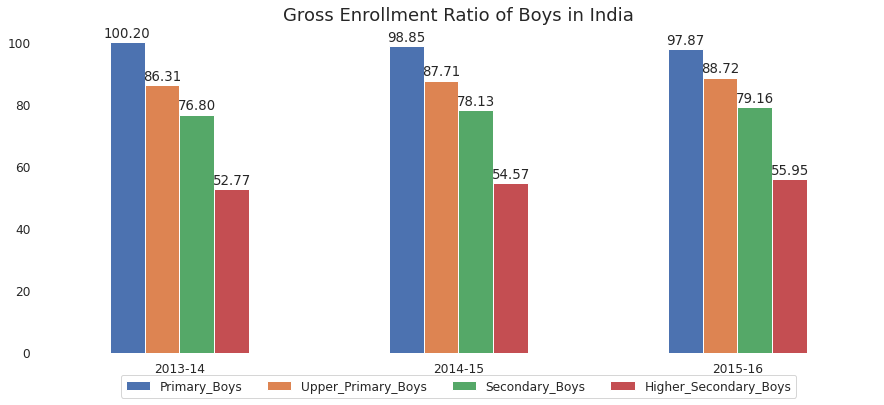

In [7]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[boys_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Boys in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

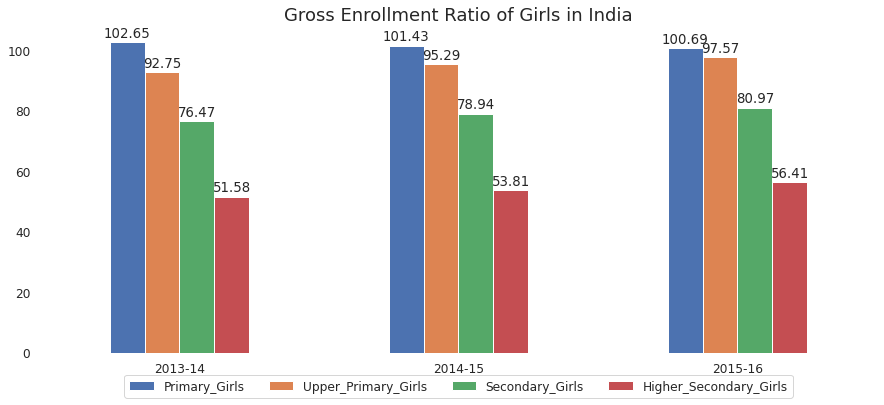

In [8]:
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = df_gre_total[girls_col].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Gross Enrollment Ratio of Girls in India',size=18)
ax.set_xticklabels(list(df_gre_total['Year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

<center><strong><h2>Gross Enrolment Ratio of Boys and Girls in different states (2013-2016)</h2></strong></center>
<br>

In [9]:
filt_year = df_enroll['Year'] =='2015-16'
df_enroll_latest = df_enroll[filt_year]
df_enroll_latest.sort_values(by='Higher_Secondary_Total',ascending=False,inplace=True)
df_enroll_latest['Higher_Secondary_Total'] = df_enroll_latest['Higher_Secondary_Total'].astype('float')

<center><strong><h3>States with highest Gross Enrolment Ratio (2015-2016)</h3></strong></center>
<br>

Text(0.5, 0.98, 'Sates with highest GER in Primary')

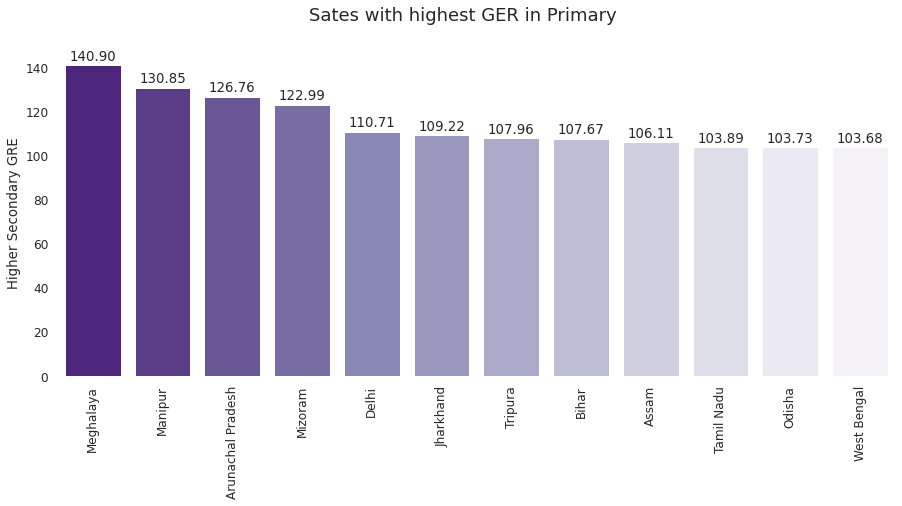

In [10]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples_r',
                 data=df_enroll_latest.sort_values(by='Primary_Total',ascending=False).head(12))
sns.despine(left=True, bottom=True)


for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


fig.suptitle('Sates with highest GER in Primary', fontsize=18)

Text(0.5, 0.98, 'Sates with highest GER in Higher Secondary')

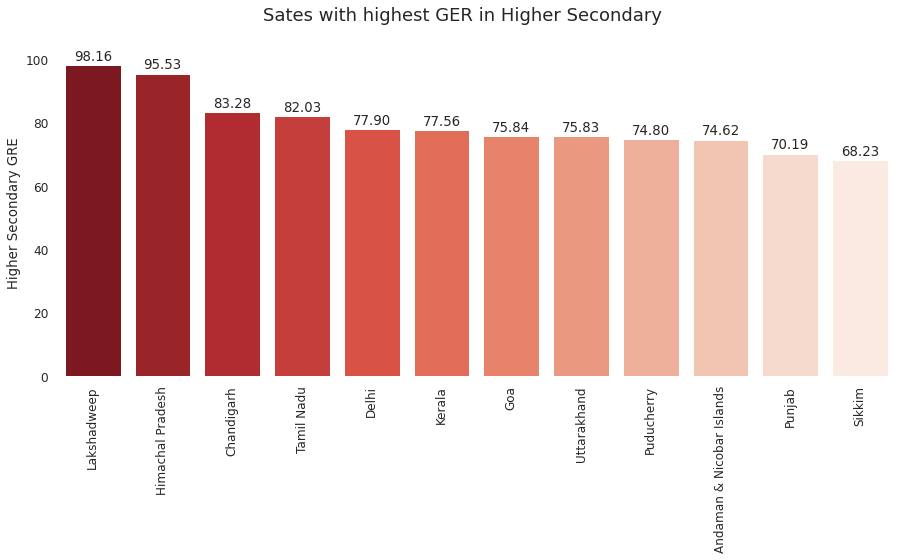

In [11]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Higher_Secondary_Total",palette='Reds_r',data=df_enroll_latest.head(12))
sns.despine(left=True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

fig.suptitle('Sates with highest GER in Higher Secondary', fontsize=18)

<center><strong><h3>States with lowest Gross Enrolment Ratio in HigherSecondary(2015-2016)</h3></strong></center>

<Br>

Text(0.5, 0.98, 'Sates with lowest Gross Enrolment Ratio in Primary')

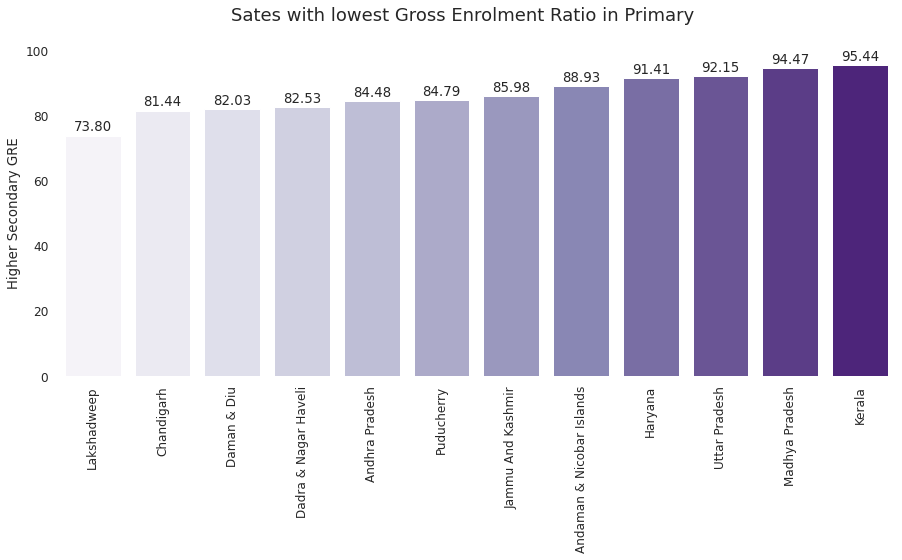

In [12]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Primary_Total",palette='Purples',
                 data=df_enroll_latest.sort_values(by='Primary_Total',ascending=False)[::-1].head(12))
sns.despine(left=True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

fig.suptitle('Sates with lowest Gross Enrolment Ratio in Primary', fontsize=18)

Text(0.5, 0.98, 'Sates with lowest Gross Enrolment Ratio in Higher Secondary')

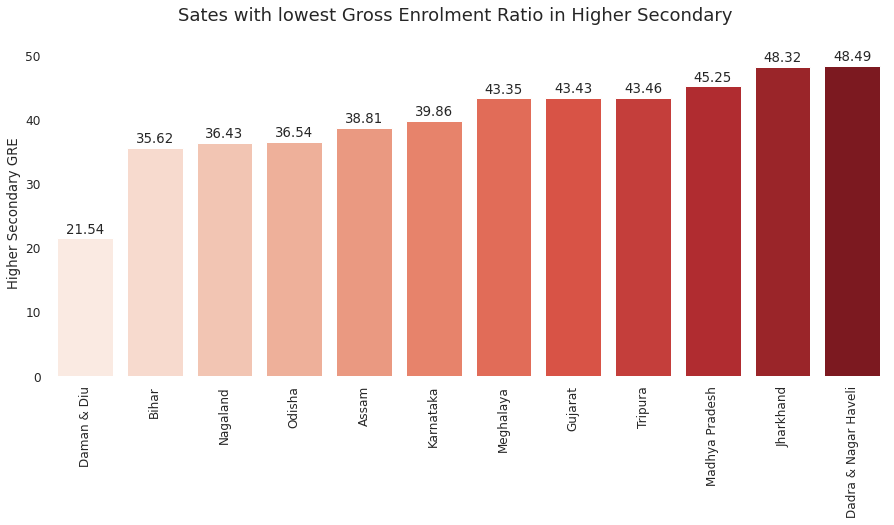

In [13]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="Higher_Secondary_Total",palette='Reds',
                 data=df_enroll_latest[::-1].head(12))
sns.despine(left=True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Higher Secondary GRE')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

fig.suptitle('Sates with lowest Gross Enrolment Ratio in Higher Secondary', fontsize=18)    

<center><strong><h2>Plots of all states in detail</h2></strong></center>
<br>

In [14]:
def plot_state(state):    
    filt_state = (df_enroll['State_UT'] == state)
    df_gre_total = df_enroll.loc[filt_state]
   
    df_gre_total.loc[:,'Higher_Secondary_Boys']=df_gre_total.loc[:,'Higher_Secondary_Boys'].astype('float')
    df_gre_total.loc[:,'Higher_Secondary_Girls']=df_gre_total.loc[:,'Higher_Secondary_Girls'].astype('float')
    sns.set(font_scale = 1.111)
   
    
    sns.set_style("white")
    fig= plt.figure(figsize=(18,12))
    
    
    ax1 = fig.add_subplot(211)
   
    ax2 = fig.add_subplot(212)
    df_gre_total[boys_col].plot.bar(ax=ax1)
    df_gre_total[girls_col].plot.bar(ax=ax2)
    sns.despine(left=True, bottom=True)
    
    
    ax1.set_xticklabels(np.arange(3))
    ax1.set_title('Gross Enrolment Ratio of Boys',size=15)
    ax1.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax1.get_xticklabels():
        tick.set_rotation(-0)
    fig.suptitle(f'{state}', fontsize=18)
    
    ax2.set_xticklabels(np.arange(3))
    ax2.set_title('Gross Enrolment Ratio of Girls',size=15)
    ax2.set_xticklabels(list(df_gre_total['Year']))
    for tick in ax2.get_xticklabels():
        tick.set_rotation(-0)

    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
        
    ax1.get_legend().remove()
    
    import matplotlib.patches as mpatches
    
    primary_patch = mpatches.Patch(color='#29629e', label='Primary')
    upper_primary_patch = mpatches.Patch(color='#ff6d05', label='Upper Primary')
    secondary_patch = mpatches.Patch(color='#226908', label='Secondary')
    higher_secondary_patch = mpatches.Patch(color='#8a1111', label='Higher Secondary')    
    ax2.legend(handles=[primary_patch, upper_primary_patch,secondary_patch,higher_secondary_patch],
               loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)
    
    

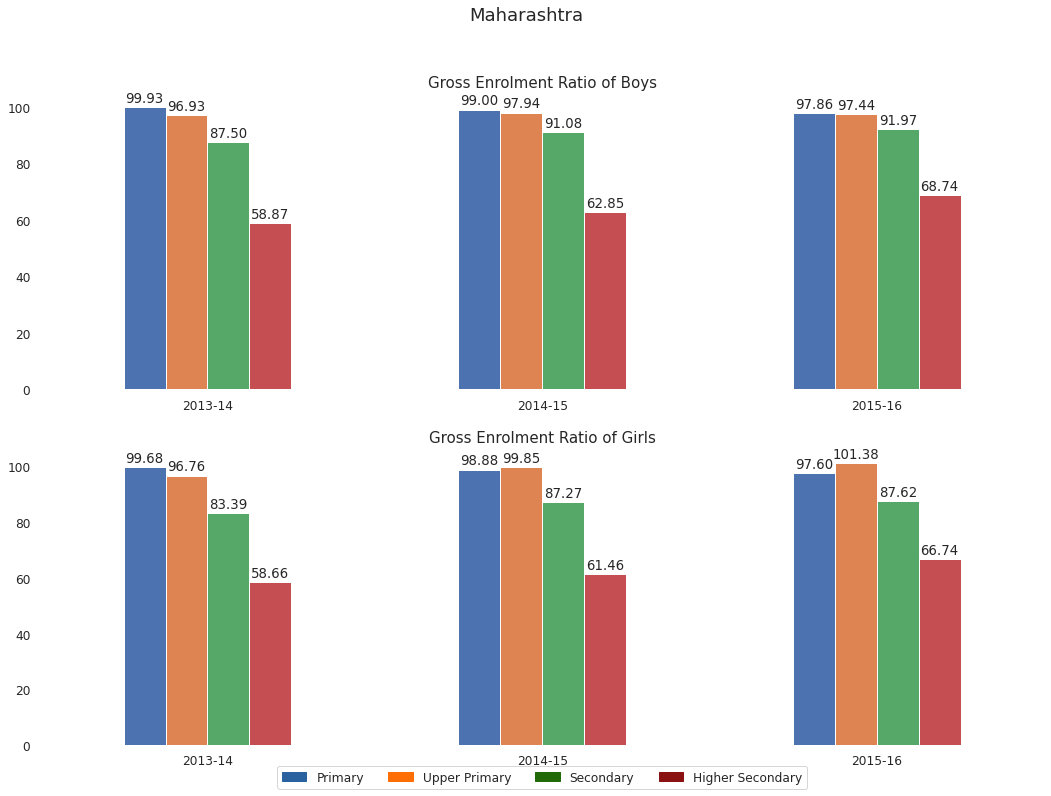

In [15]:
plot_state('Maharashtra')

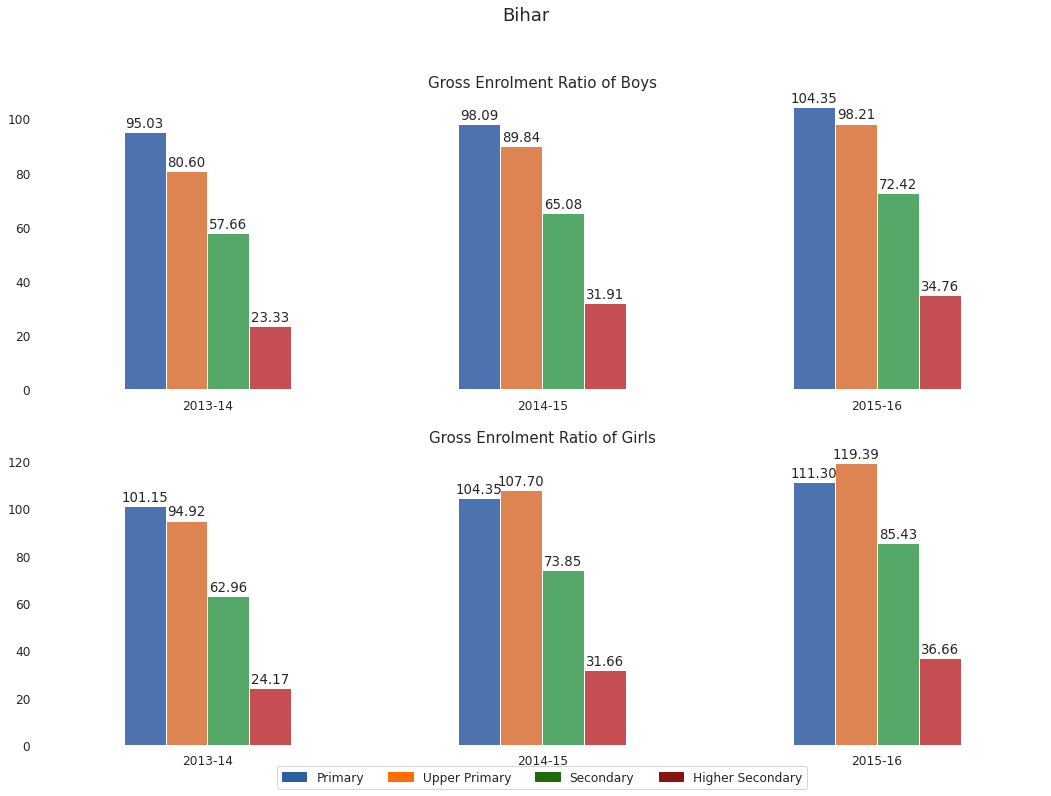

In [16]:
plot_state('Bihar')

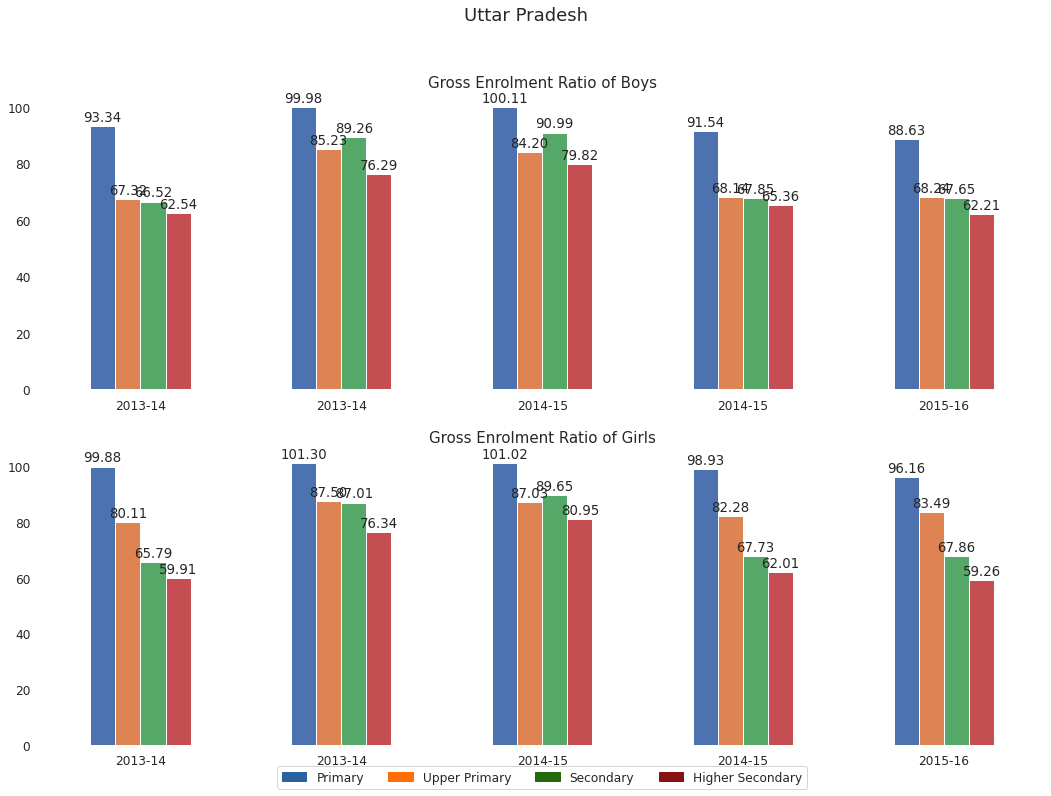

In [17]:
plot_state('Uttar Pradesh')

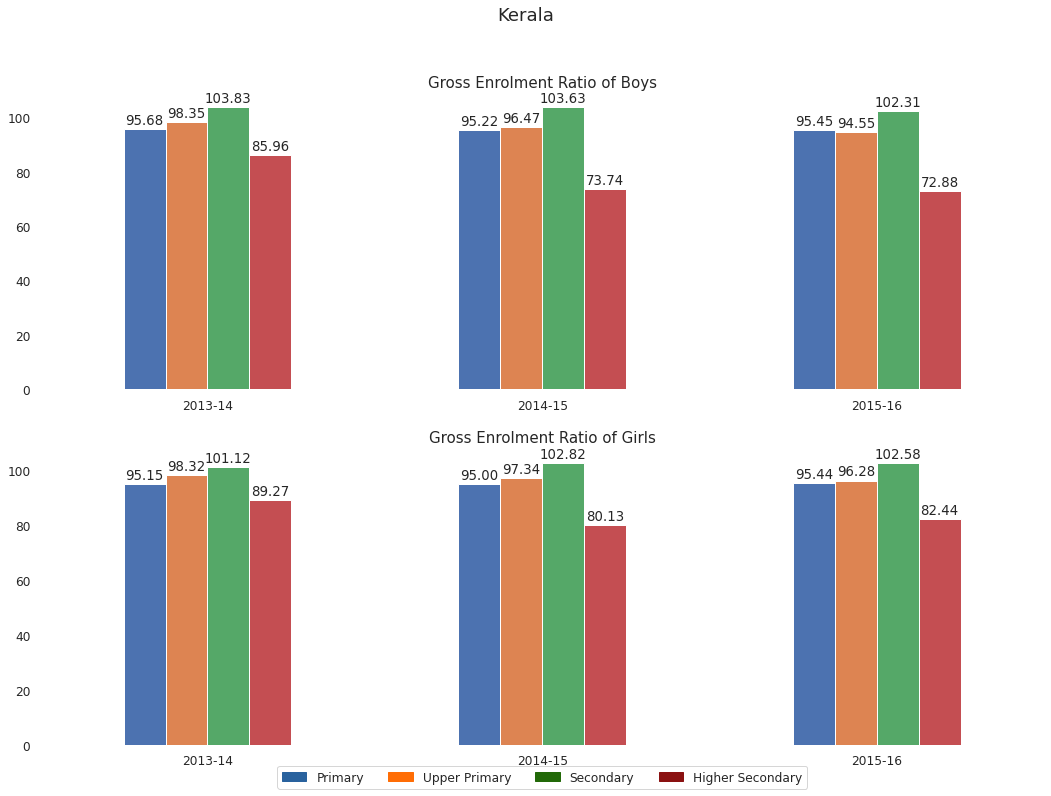

In [18]:
plot_state('Kerala')

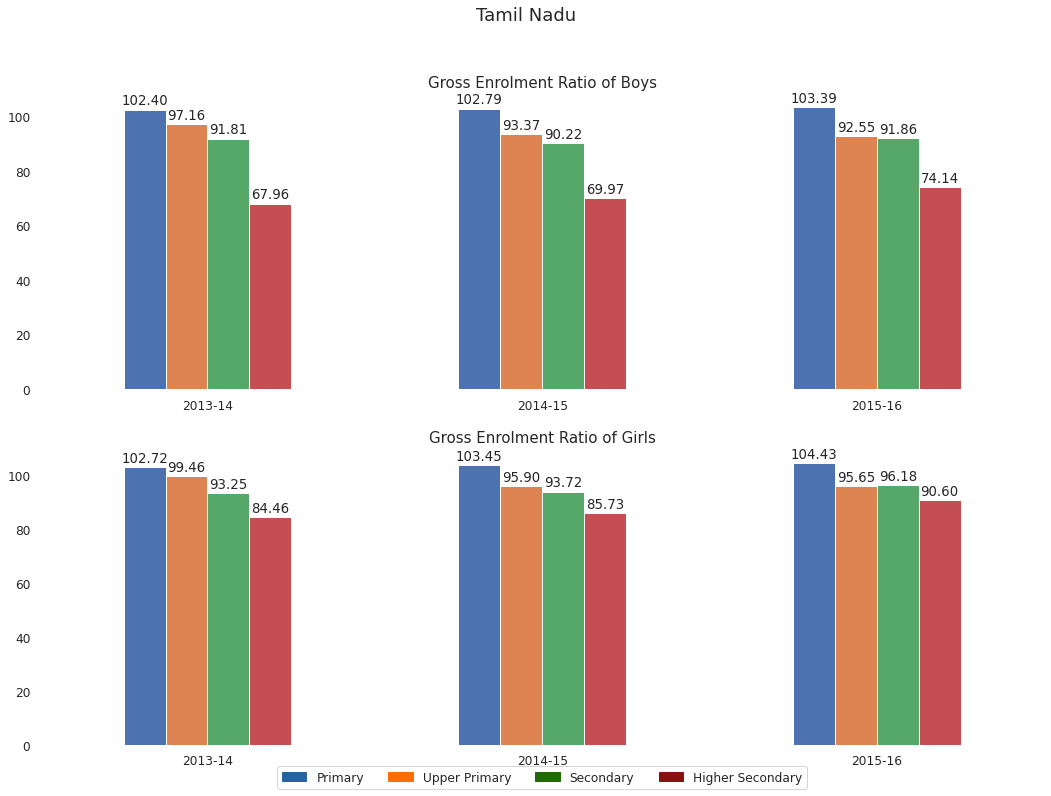

In [19]:
plot_state('Tamil Nadu')

<center><strong><h2>Visualizing the data in a map</h2></strong></center>
<br>



In [20]:
states = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')

In [21]:
states['st_nm'].replace({
    'Andaman & Nicobar Island':'Andaman & Nicobar Islands',
    'Arunanchal Pradesh':'Arunachal Pradesh',
    'NCT of Delhi':'Delhi',
    'Jammu & Kashmir':'Jammu And Kashmir',
    'Dadara & Nagar Havelli':'Dadra & Nagar Haveli'    
},inplace=True)

df_enroll.rename(columns={
    'State_UT':'state'
},inplace=True)

states.rename(columns={
    'st_nm':'state'
},inplace=True)

In [22]:
latest_filt = df_enroll['Year'] =='2015-16'
states_op = states.merge(df_enroll.loc[latest_filt][1:].sort_values(by='state'),on='state')

In [23]:
cols=['Primary_Boys','Primary_Girls','Primary_Total','Upper_Primary_Boys',
      'Upper_Primary_Girls','Upper_Primary_Total','Secondary_Boys','Secondary_Girls',
      'Secondary_Total','Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']
states_op[cols] = states_op[cols].astype('float')

<center><strong><h3>Plotting the data by gender</h3></strong></center>

<br>

Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of boys across India')

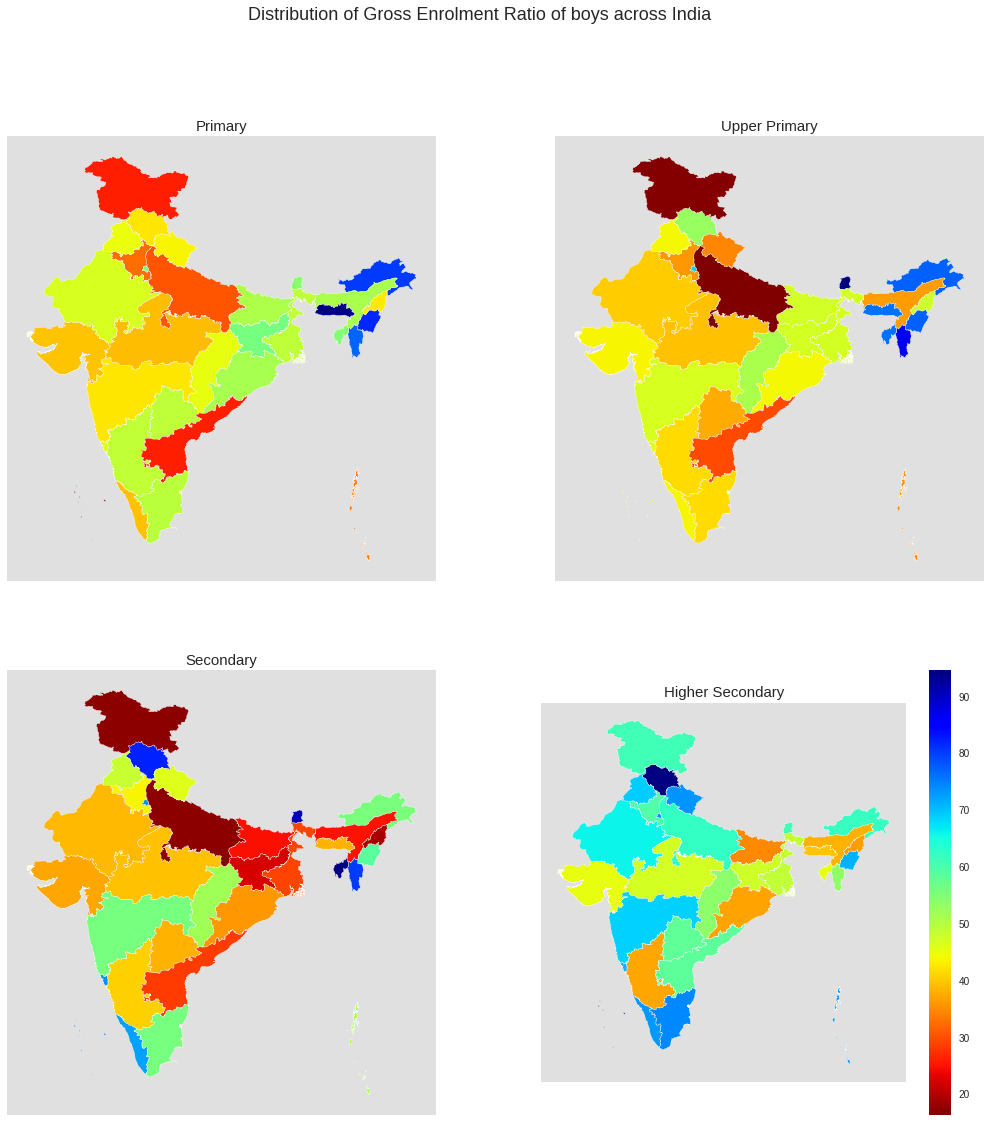

In [24]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
plt.style.use('seaborn')
states_op.plot(column='Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Boys',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of boys across India', fontsize=18)


Text(0.5, 0.98, 'Distribution of Gross Enrolment Ratio of girls across India')

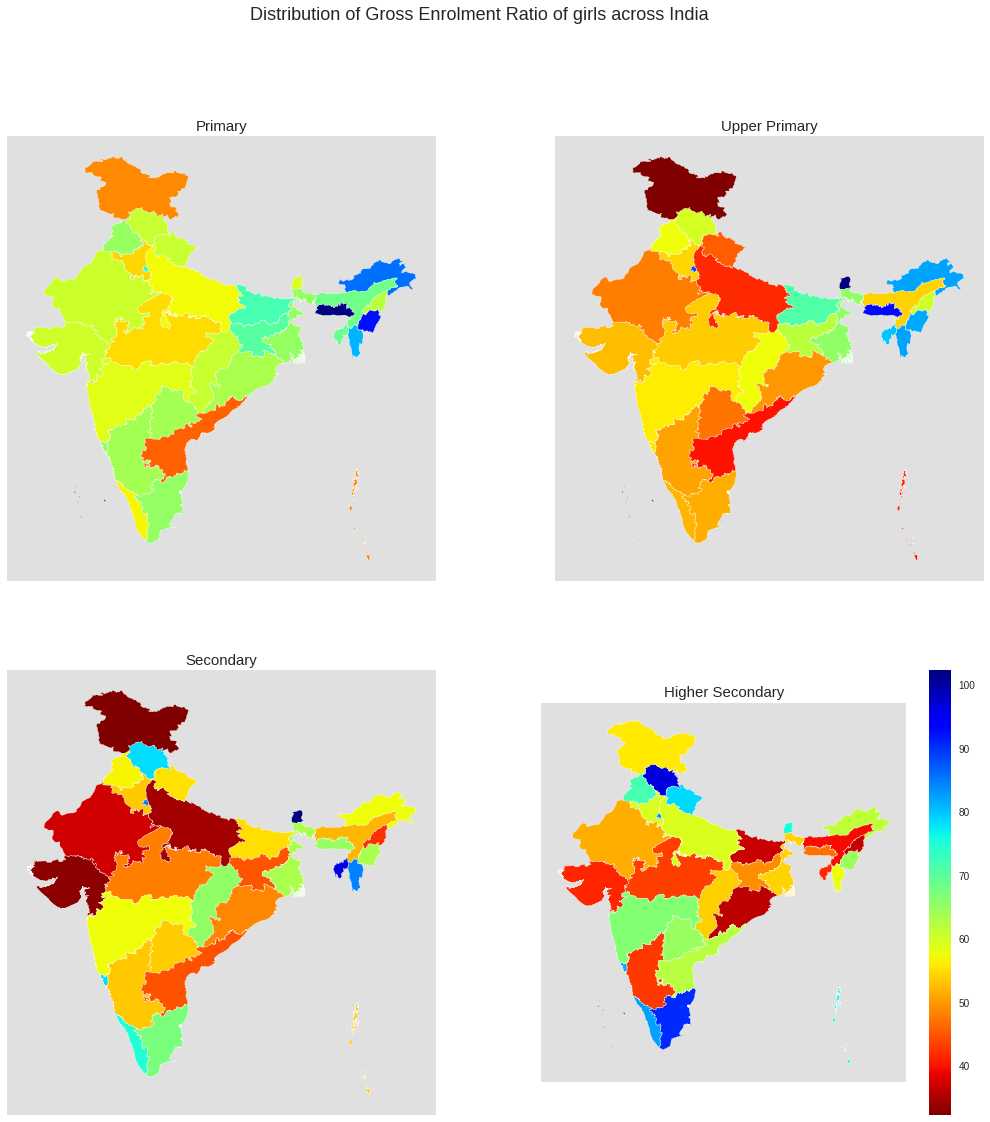

In [25]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
plt.style.use('seaborn')
states_op.plot(column='Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Primary',fontsize=15)
states_op.plot(column='Upper_Primary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Upper Primary',fontsize=15)
states_op.plot(column='Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Secondary',fontsize=15)
states_op.plot(column='Higher_Secondary_Girls',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Higher Secondary',fontsize=15)

ax[0,0].set_facecolor('#e0e0e0')
ax[0,1].set_facecolor('#e0e0e0')
ax[1,0].set_facecolor('#e0e0e0')
ax[1,1].set_facecolor('#e0e0e0')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Distribution of Gross Enrolment Ratio of girls across India', fontsize=18)